# Определение перспективного тарифа для телеком компании

Телеком компания предлагает клиентам два тарифных плана: «Смарт» и «Ультра».

##  Описание тарифов

### Тариф «Смарт»

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:

    минута разговора: 3 рубля

    сообщение: 3 рубля

    1 Гб интернет-трафика: 200 рублей

### Тариф «Ультра»

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:

    минута разговора: 1 рубль

    сообщение: 1 рубль

    1 Гб интернет-трафика: 150 рублей

Значения минут и мегабайтов всегда округляются вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

В распоряжении имеются следующие данные:
1. Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана
2. Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок
3. Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение
4. Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя
5. Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета

**Задачи**:
1. Понять, какой тариф более перспективный.
2. Проверить гипотезу, что средняя выручка с пользователей тарифов «Ультра» и «Смарт» различаются.
3. Проверить гипотезу, что средняя выручка с пользователей из Москвы отличается от выручки с пользователей из других регионов.

## 1. Загрузка данных. Общая информация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
calls = pd.read_csv('C:/Users/leoci/Яндекс Практикум/Projects/Statistical_data_analysis/calls.csv')
display(calls.head())
print('')
print(calls.info())
print('')
print(calls.duplicated().sum())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

0


In [3]:
internet = pd.read_csv('C:/Users/leoci/Яндекс Практикум/Projects/Statistical_data_analysis/internet.csv')
display(internet.head())
print('')
print(internet.info())
print('')
print(internet.duplicated().sum())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None

0


In [4]:
messages = pd.read_csv('C:/Users/leoci/Яндекс Практикум/Projects/Statistical_data_analysis/messages.csv')
display(messages.head())
print('')
print(messages.info())
print('')
print(messages.duplicated().sum())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

0


In [5]:
tariffs = pd.read_csv('C:/Users/leoci/Яндекс Практикум/Projects/Statistical_data_analysis/tariffs.csv')
display(tariffs.head())
print('')
print(tariffs.info())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


In [6]:
users = pd.read_csv('C:/Users/leoci/Яндекс Практикум/Projects/Statistical_data_analysis/users.csv')
display(users.head())
print('')
print(users.info())
print('')
print(users.duplicated().sum())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

0


### Вывод

Данные представлены корректно. Пропуски в датасетах отсутствуют, дубликаты тоже. Названия столбцов корректные.

В датасетах "calls" и "internet" присутствуют нулевые значения в столбцах "duration" и "mb_used" соответственно. В данных по звонкам это, скорее всего, пропущенные вызовы. В данных по интернету - какие-то ошибки, нулевые сессии. 

## 2. Подготовка данных

### Изменение типов данных, обработка нулевых значений

Приведем данные к нужным типам. Заменим тип данных в столбцах, содержащих дату.

In [7]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Нулевые значения в длительности звонков - скорее всего пропущенные входящие звонки. Как известно, входящие звонки, особенно пропущенные, являются бесплатными. Так же, эти звонки не вносят никакого вклада в общую статистику по минутам разговора абонента. Таким образом, данные звонки лучше просто удалить, чтобы не портили статистику.

Такая же ситуация с интернет сессиями равными нулю. 

In [8]:
calls = calls.query("duration != 0").reset_index(drop=True)
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162994 entries, 0 to 162993
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         162994 non-null  object        
 1   call_date  162994 non-null  datetime64[ns]
 2   duration   162994 non-null  float64       
 3   user_id    162994 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.0+ MB
None


In [9]:
internet = internet.query("mb_used != 0").reset_index(drop=True)
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129798 entries, 0 to 129797
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    129798 non-null  int64         
 1   id            129798 non-null  object        
 2   mb_used       129798 non-null  float64       
 3   session_date  129798 non-null  datetime64[ns]
 4   user_id       129798 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.0+ MB
None


В данных про интернет присутствует странный столбец "Unnamed: 0", который просто дублирует индексы датасета. Удалим данный столбец.

In [10]:
internet = internet.drop('Unnamed: 0', 1)

### Добавление данных в таблицу

Посчитаем общее количесвто потраченных за календарный месяц минут, мегабайт и сообщений для каждого абонента.

Данные приведены только за 2018 год, поэтому создадим столбец с номером месяца и сгруппируем данные по нему.

In [11]:
calls['month'] = calls['call_date'].dt.month
calls_users = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'sum').reset_index()

internet['month'] = internet['session_date'].dt.month
internet_users = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum').reset_index()

messages['month'] = messages['message_date'].dt.month
messages_users = messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count')
messages_users.columns = ['messages']
messages_users.reset_index(inplace=True)
print(calls_users.info())
print('')
print(internet_users.info())
print('')
print(messages_users.info())
print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3168 non-null   int64  
 1   month     3168 non-null   int64  
 2   duration  3168 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 74.4 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  3201 non-null   int64  
 1   month    3201 non-null   int64  
 2   mb_used  3201 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.1 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   2717 non-null   int64
 1   month     2717 non-null   int64
 2   messages  2717 non-null   int6

Создадим общую таблицу с ежемесячными данными о минутах, мегабайтах и сообщениях для каждого абонента. В неё же добавим название тарифа для каждого абонента.

In [12]:
users_data = pd.merge(calls_users, internet_users, how='outer', on=['user_id','month'])
users_data = pd.merge(users_data, messages_users, how='outer', on=['user_id','month'])
users_tariff = users[['user_id', 'city', 'tariff']] 
users_data = pd.merge(users_data, users_tariff, how='left', on='user_id')
display(users_data.head(10))
print('')
print(users_data.info())

,user_id,month,duration,mb_used,messages,city,tariff
0,1000,5,150.06,2253.49,22.0,Краснодар,ultra
1,1000,6,158.90,23233.77,60.0,Краснодар,ultra
2,1000,7,318.80,14003.64,75.0,Краснодар,ultra
3,1000,8,389.87,14055.93,81.0,Краснодар,ultra
4,1000,9,440.14,14568.91,57.0,Краснодар,ultra
5,1000,10,328.45,14702.49,73.0,Краснодар,ultra
6,1000,11,319.04,14756.47,58.0,Краснодар,ultra
7,1000,12,312.98,9817.61,70.0,Краснодар,ultra
8,1001,11,408.12,18429.34,NaN,Москва,smart
9,1001,12,391.34,14036.66,NaN,Москва,smart



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3214 non-null   int64  
 1   month     3214 non-null   int64  
 2   duration  3168 non-null   float64
 3   mb_used   3201 non-null   float64
 4   messages  2717 non-null   float64
 5   city      3214 non-null   object 
 6   tariff    3214 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 200.9+ KB
None


Добавим в общую графу итоговую плату абонента за месяц

In [13]:
tariffs.set_index('tariff_name', inplace=True)
tariffs.index.name = None
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


In [14]:
def profit(row):
    user_tariff = row['tariff']
    
    if row['duration'] - tariffs.loc[user_tariff, 'minutes_included'] > 0:
        calls_cost = np.ceil(row['duration'] - tariffs.loc[user_tariff, 'minutes_included']) * tariffs.loc[user_tariff, 'rub_per_minute']
    else:
        calls_cost = 0
        
    if row['mb_used'] - tariffs.loc[user_tariff, 'mb_per_month_included'] > 0:
        internet_cost = np.ceil((row['mb_used'] - tariffs.loc[user_tariff, 'mb_per_month_included']) / 1024) * tariffs.loc[user_tariff, 'rub_per_gb']
    else:
        internet_cost = 0
        
    if row['messages'] - tariffs.loc[user_tariff, 'messages_included'] > 0:
        messages_cost = (row['messages'] - tariffs.loc[user_tariff, 'messages_included']) * tariffs.loc[user_tariff, 'rub_per_message']
    else:
        messages_cost = 0
    
    total_cost = calls_cost + internet_cost + messages_cost + tariffs.loc[user_tariff, 'rub_monthly_fee']
    return total_cost
    
users_data['total_cost'] = users_data.apply(profit, axis = 1)

In [15]:
print(users_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     3214 non-null   int64  
 1   month       3214 non-null   int64  
 2   duration    3168 non-null   float64
 3   mb_used     3201 non-null   float64
 4   messages    2717 non-null   float64
 5   city        3214 non-null   object 
 6   tariff      3214 non-null   object 
 7   total_cost  3214 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 226.0+ KB
None


### Вывод

Данные были подготовлены для удобной работы с ними. Были обработаны нулевые значения, изменен тип данных. 

Данные были собраны в единую наглядную таблицу, сгруппированы по месяцам для каждого абонента. В эту же таблицу были посчитаны и добвлены итоговые затраты в каждый месяц для каждого абонента.

## 3. Анализ данных

Создадим две отдельные таблицы с данными для абонентов, использующих тарифы "Ультра" и "Смарт".

In [16]:
smart_data = users_data.query('tariff == "smart"')
ultra_data = users_data.query('tariff == "ultra"')

### Интернет

Проанализируем использование интернет-трафика абонентами.

Посчитаем средний объем интернет-трафика в месяц, дисперсию и стандартное отклонение для пользователей каждого тарифа.

In [17]:
users_data.groupby('tariff').agg({'mb_used': ['mean', np.std, np.var]}).T.astype('int')

tariff           smart     ultra
mb_used mean     16222     19688
        std       5852      9928
        var   34257208  98567864

Средний объем интернет-трафика в месяц у пользователей тарифа "Смарт" превышает объем, включенный в абонентскую плату. У пользователей тарифа "Ультра" - наоборот.

Построим диаграммы размаха и гистограммы использования интернет трафика для обоих тарифов.

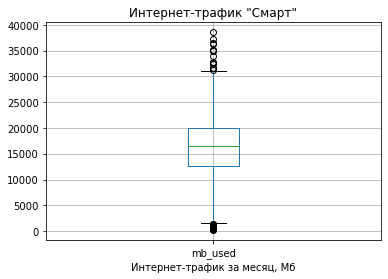

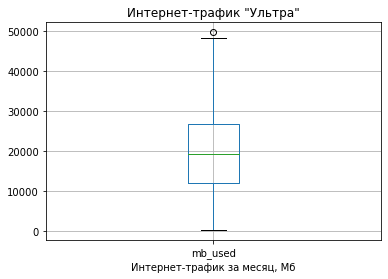

In [18]:
smart_data.boxplot('mb_used')
plt.title('Интернет-трафик "Смарт"')
plt.xlabel('Интернет-трафик за месяц, Мб')
plt.show()

ultra_data.boxplot('mb_used')
plt.title('Интернет-трафик "Ультра"')
plt.xlabel('Интернет-трафик за месяц, Мб')
plt.show()

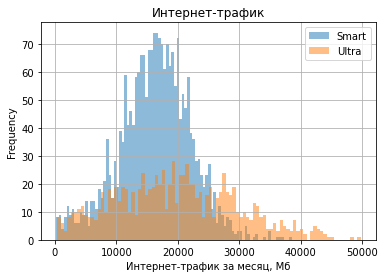

In [19]:
smart_data['mb_used'].plot(kind='hist', bins=90, grid=True, title='Интернет-трафик', alpha=0.5, legend=True, label='Smart')
plt.xlabel('Интернет-трафик за месяц, Мб')
ultra_data['mb_used'].plot(kind='hist', bins=90, grid=True, title='Интернет-трафик', alpha=0.5, legend=True, label='Ultra')
plt.show()

Из графиков видно, что у пользователей тарифа "Смарт" объём потраченного интернет трафика распределён нормально, при этом больше половины пользователей перерасходуют интернет. 

Среди пользователей тарифа "Ультра" перерасходующих интернет меньше, и больше среднеквадратичное отклонение величины. В данном тарифе лимиты достаточно большие для обычной жизни, можно предположить, что тариф часто используют для какого-нибудь одного пакета, например для большого количества звонков.

### Звонки

Проанализируем использование минут абонентами.

Посчитаем среднее количество минут в месяц, дисперсию и стандартное отклонение для пользователей каждого тарифа.

In [20]:
users_data.groupby('tariff').agg({'duration': ['mean', np.std, np.var]}).T.astype('int')

tariff         smart  ultra
duration mean    395    517
         std     178    288
         var   31940  83232

Среднее количество минут в месяц у пользователей тарифа "Смарт" не превышает объем, включенный в абонентскую плату. У пользователей тарифа "Ультра" в среднем расходуется больше минут, но значительно меньше, чем лимит по данному тарифу.

Построим диаграммы размаха и гистограммы использования минут для обоих тарифов.

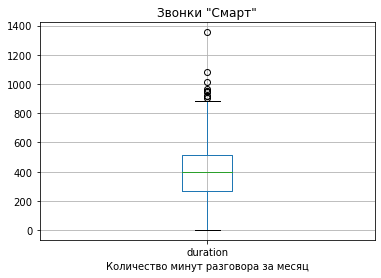

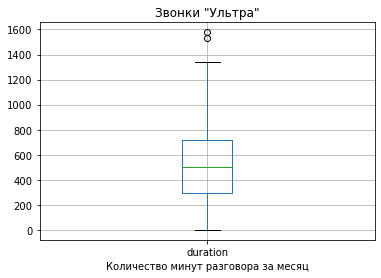

In [21]:
smart_data.boxplot('duration')
plt.title('Звонки "Смарт"')
plt.xlabel('Количество минут разговора за месяц')
plt.show()

ultra_data.boxplot('duration')
plt.title('Звонки "Ультра"')
plt.xlabel('Количество минут разговора за месяц')
plt.show()

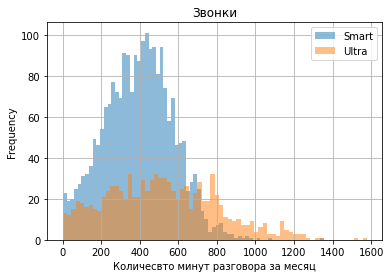

In [22]:
smart_data['duration'].plot(kind='hist', bins=70, grid=True, title='Звонки', alpha=0.5, legend=True, label='Smart')
plt.xlabel('Количесвто минут разговора за месяц')
ultra_data['duration'].plot(kind='hist', bins=70, grid=True, title='Звонки', alpha=0.5, legend=True, label='Ultra')
plt.show()

Из графиков видно, что у пользователей тарифа "Смарт" количество потраченных минут представляет собой распределение Пуассона, при этом медиана равняется 400 минут и приблизительно соответствует мат. ожиданию данного распределения, а третий квартиль заканчивается на 500, что равняется лимиту по тарифу. Таким образом, большинству пользователей данного тарифа достаточно предоставляемого пакета. Так же, можно заметить выбросы - пользователей, тратящих больше 1000 минут в месяц, данным абонентам стоит задуматься о смене тарифа.

Среди пользователей тарифа "Ультра" перерасходующих минуты нет, большинсвто людей тратят от 300 до 700 минут в месяц.

### Сообщения

Проанализируем использование сообщений абонентами.

Посчитаем среднее количество сообщений в месяц, дисперсию и стандартное отклонение для пользователей каждого тарифа.

In [23]:
users_data.groupby('tariff').agg({'messages': ['mean', np.std, np.var]}).T.astype('int')

tariff         smart  ultra
messages mean     38     61
         std      26     45
         var     717   2109

Видно, пользователи "Смарт" в среднем укладываются в предоставленное количество сообщений, а пользователи "Ультра" не могут израсходовать весь предоставленный объем сообщений. 

Построим диаграммы размаха и гистограммы использования сообщений для обоих тарифов.

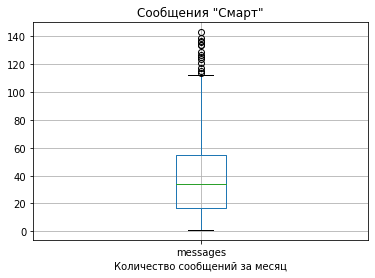

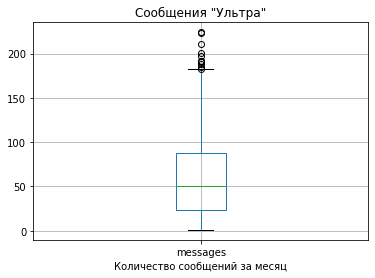

In [24]:
smart_data.boxplot('messages')
plt.title('Сообщения "Смарт"')
plt.xlabel('Количество сообщений за месяц')
plt.show()

ultra_data.boxplot('messages')
plt.title('Сообщения "Ультра"')
plt.xlabel('Количество сообщений за месяц')
plt.show()

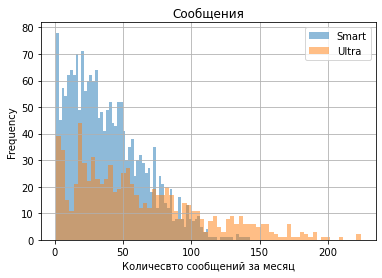

In [25]:
smart_data['messages'].plot(kind='hist', bins=70, grid=True, title='Сообщения', alpha=0.5, legend=True, label='Smart')
plt.xlabel('Количесвто сообщений за месяц')
ultra_data['messages'].plot(kind='hist', bins=70, grid=True, title='Сообщения', alpha=0.5, legend=True, label='Ultra')
plt.show()

Потраченные сообщения за месяц на обоих тарифах - это среднее количество событий (отправленных сбщ) за единицу времени (1 месяц), а такая дискретная величина распределяется согласно распределению Пуассона, что наглядно подтверждается гистограммами. На тарифе "Смарт" почти 3 квартиля пользователей укладываются в предоставленные лимиты по сообщениям, однако остальным сообщений не хватает. На тарифе "Ультра" лимит достаточно большой, что никто не может потратить даже одну пятую его часть.

### Вывод

В целом, пользователям тарифа "Смарт" гораздо сильнее не хватает предоставляемых пакетов, и приходится переплачивать за дополнительный объем данных. В то время как почти все пользователи "Ультра" укладываются в лимиты по всем параметрам, а по звонкам и сообщениям не могут израсходовать даже половину лимитов.

## 4. Проверка гипотез

По заданию необходимо проверить две гипотезы:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Проверяем первую гипотезу. Нулевая гипотеза должна формулироваться исходя из знака равенства. Сформулируем нулевую гипотезу: "средняя выручка тарифов "Ультра" и "Смарт" равна". Тогда альтернативная гипотеза будет следующая: "средняя выручка пользователей тарифов "Ультра" и "Смарт" не равна"

Предварительно проверим, можно ли считать дисперсии наших выборок равными.

In [26]:
print('Дисперсии отличаются на: {:.1%}'
      .format(
          (max(np.var(ultra_data['total_cost']), np.var(smart_data['total_cost']))
          - min(np.var(ultra_data['total_cost']), np.var(smart_data['total_cost'])))
          / min(np.var(ultra_data['total_cost']), np.var(smart_data['total_cost'])))
     )

Дисперсии отличаются на: 353.5%


Дисперсии отличаются очень сильно, поэтому параметр equal_var при тестировании будет иметь значение False

In [27]:
from scipy import stats as st

alpha = .05

results_1 = st.ttest_ind(smart_data['total_cost'], ultra_data['total_cost'], equal_var=False)

print('p-value:', results_1.pvalue)

if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 6.179723168444486e-274
Отвергаем нулевую гипотезу


Как видно из результата т-теста, полученное p-value много меньше 1%, значит выручки с пользователей тарифов "Ультра" и "Смарт" отличаются.

Построим диаграммы размаха для выручек по данным тарифам, для наглядного представления их отличия.

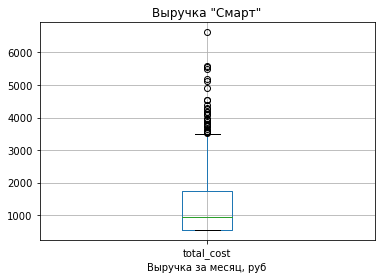

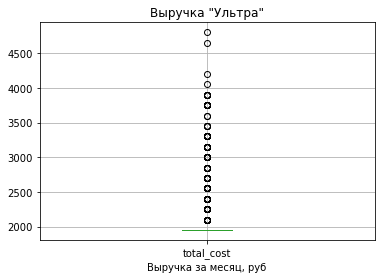

In [28]:
smart_data.boxplot('total_cost')
plt.title('Выручка "Смарт"')
plt.xlabel('Выручка за месяц, руб')
plt.show()

ultra_data.boxplot('total_cost')
plt.title('Выручка "Ультра"')
plt.xlabel('Выручка за месяц, руб')
plt.show()

Из диаграмм размаха видно, что пользователи тарифа "Ультра" все укладываются в абонентскую плату, за исключением отдельных выбросов. Медианная оплата мобильной связи у пользователей тарифа "Смарт" почти в 2 раза превышает абонентскую плату, но больше трёх квартилей пользователей по прежнему платят меньше, чем по тарифу "Ультра".

Проверяем вторую гипотезу. Нулевая гипотеза должна формулироваться исходя из знака равенства. Сформулируем нулевую гипотезу: "средняя выручка пользователей из Москвы и из других регионов равна". Тогда альтернативная гипотеза будет следующая: "средняя выручка пользователей из Москвы и из других регионов не равна"

Проверим, что в столбце "город" все названия заданы корректно и создадим два отдельных датасета для пользователей из Москвы и из других регионов.

In [29]:
print(users_data['city'].unique())

['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Волгоград' 'Саранск' 'Ижевск'
 'Новосибирск' 'Брянск' 'Тольятти' 'Нижний Тагил' 'Орёл' 'Белгород'
 'Воронеж' 'Курган' 'Барнаул' 'Красноярск' 'Архангельск' 'Липецк'
 'Кемерово' 'Киров' 'Сургут' 'Пенза' 'Волжский' 'Магнитогорск'
 'Нижний Новгород' 'Кострома' 'Владивосток' 'Тамбов' 'Балашиха'
 'Севастополь' 'Калининград' 'Оренбург' 'Смоленск' 'Нижневартовск'
 'Владимир' 'Новороссийск' 'Грозный' 'Подольск']


In [30]:
moscow_data = users_data.query('city == "Москва"')
regions_data = users_data.query('city != "Москва"')

Предварительно проверим, можно ли считать дисперсии наших выборок равными.

In [31]:
print('Дисперсии отличаются на: {:.1%}'
      .format(
          (max(np.var(moscow_data['total_cost']), np.var(regions_data['total_cost']))
          - min(np.var(moscow_data['total_cost']), np.var(regions_data['total_cost'])))
          / min(np.var(moscow_data['total_cost']), np.var(regions_data['total_cost'])))
     )

Дисперсии отличаются на: 14.6%


Дисперсии отличаются больше чем на 10%, значит параметр equal_var=False

In [32]:
alpha = .05

results_2 = st.ttest_ind(moscow_data['total_cost'], regions_data['total_cost'], equal_var=False)
print('p-value:', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.46532858228722906
Не отвергаем нулевую гипотезу


Исходя из полученного p-value, можно сделать вывод, что высока вероятность того, что абоненты из Москвы и правда приносят телеком компании больше выручку, чем абоненты из других регионов.

## Вывод

В данной работе были проанализированы данные об использовании абонентами двух тарифов компании "Мегалайн". В ходе работы была создана общая таблица, включающая данные об использовании всех пакетов услуг каждым абонентом помесячно, была посчитана ежемесячная выручка компании с каждого абонента.

Из построенных графиков и проведенных анализов можно сделать выводы:
1. В соврменном мире очень мало используются сообщения, важнее всего людям интернет и звонки.
2. Предоставляемого оператором интернета часто недостаточно, даже на дорогом тарифе.
3. Выручка с тарифа "Ультра" больше, даже с учетом перерасхода пакетов абонентами тарифа "Смарт".
4. Высока вероятность того, что пользователи из Москвы приносят больше выручку, чем из других регионов.